In [2]:
"""
<주택(아파트 기준) 가격 예측>
 - 주제: 면적, 층수, 역까지 도보시간, 주변 편의시설 점수를 이용하여 주택가격을 예측하고자 함
 - 독립변수: 면적, 층수, 역까지의 도보시간, 주변 편의시설 점수
 - 종속변수: 주택가격
 - 분석방법: 종속변수는 연속형 데이터로형태로 -> 회귀분석으로 수행
 - 독립변수의 데이터 형태: 문자가 있다면 -> 숫자로 모두 변환해야함(특히 범주형 문자인 경우)
"""

'\n<주택(아파트 기준) 가격 예측>\n - 주제: 면적, 층수, 역까지 도보시간, 주변 편의시설 점수를 이용하여 주택가격을 예측하고자 함\n - 독립변수: 면적, 층수, 역까지의 도보시간, 주변 편의시설 점수\n - 종속변수: 주택가격\n - 분석방법: 종속변수는 연속형 데이터로형태로 -> 회귀분석으로 수행\n - 독립변수의 데이터 형태: 문자가 있다면 -> 숫자로 모두 변환해야함(특히 범주형 문자인 경우)\n'

In [3]:
"""
<분석과정>
 1. 데이터 수집
 
 2. 데이터 전처리(결측, 이상, 중복)
 
 3. 데이터 탐색(시각적으로 현황 분석 및 인사이트 도출, 예측 가능한 주제 선별)
 
 4. 데이터 가공(후처리, 필요한 특성 별도로 추출)
 
 5. 데이터 특성간의 상관관계 확인
  -> 선형관계 또는 수평관계인지 산점도 확인
   -> 선형관계 분포: 회귀분석 진행
   -> 수평관계 분포: 분류분석 진행
  -> 상관관계 확인: 상관성이 있는지 확인
  
 6. 특성들의 유의미성(p-value) 검증(또는 상관관계 검증, 검정이라고도 합니다.)
 
 7. 상관관계 검증에 따른 데이터 가공(후처리 추가 진행, 필요한 특성 재정의)
 
 8. 훈련하기
  - 훈련을 위한 전처리(특정공학적용 or 스케일링, 데이터 분리)
  - 훈련모델 생성
  - 훈련시키기
  - 훈련 및 검증(또는 테스트) 정확도(결정계수) 확인
  - 과적합 여부 판단
   -> 과대 또는 과소적합이 발생한 경우 처리(데이터 늘리기, 튜닝, 다른 모델로 전환)
  - 테스트 데이터로 예측하기
  - 평가하기(오차 확인하기)
   -> 평균절대오차(MAE), 평균제곱오차(MSE), 결정계수(R2-Score)
   
 9. 최종 모델 선정
  - 여러 전처리 방법과 튜닝을 통해서 다방면으로 비교하여,
   -> 가장 우수한 모델 선정
   -> 선정 기준: 훈련정확도와 검증(테스트) 정확도(결정계수) 높고,
               : 과적합여부(차이)가 작고
               : 테스트 평가결과의 정확도(결정계수, R2-Score)이 높고
               : 오차율이 낮고
   ** 모델 최종 선정 시 선정기준을 따르지만, 정확하게 구분이 어려운 경우에는
      위 선정기준을 종합적으로 비교 분석하여 분석가가 결정하게 됨

 10. 최종 선정된 모듈을 이용하여 서비스 구현
  - 서비스: 웹서비스(웹서버 및 DB서버 구축 기술 습득 후 진행), 
          : 어플리케이션 서비스(별도의 어플리케이션 개발 프로그램 습득 후 진행) 등등...
"""

'\n<분석과정>\n 1. 데이터 수집\n \n 2. 데이터 전처리(결측, 이상, 중복)\n \n 3. 데이터 탐색(시각적으로 현황 분석 및 인사이트 도출, 예측 가능한 주제 선별)\n \n 4. 데이터 가공(후처리, 필요한 특성 별도로 추출)\n \n 5. 데이터 특성간의 상관관계 확인\n  -> 선형관계 또는 수평관계인지 산점도 확인\n   -> 선형관계 분포: 회귀분석 진행\n   -> 수평관계 분포: 분류분석 진행\n  -> 상관관계 확인: 상관성이 있는지 확인\n  \n 6. 특성들의 유의미성(p-value) 검증(또는 상관관계 검증, 검정이라고도 합니다.)\n \n 7. 상관관계 검증에 따른 데이터 가공(후처리 추가 진행, 필요한 특성 재정의)\n \n 8. 훈련하기\n  - 훈련을 위한 전처리(특정공학적용 or 스케일링, 데이터 분리)\n  - 훈련모델 생성\n  - 훈련시키기\n  - 훈련 및 검증(또는 테스트) 정확도(결정계수) 확인\n  - 과적합 여부 판단\n   -> 과대 또는 과소적합이 발생한 경우 처리(데이터 늘리기, 튜닝, 다른 모델로 전환)\n  - 테스트 데이터로 예측하기\n  - 평가하기(오차 확인하기)\n   -> 평균절대오차(MAE), 평균제곱오차(MSE), 결정계수(R2-Score)\n   \n 9. 최종 모델 선정\n  - 여러 전처리 방법과 튜닝을 통해서 다방면으로 비교하여,\n   -> 가장 우수한 모델 선정\n   -> 선정 기준: 훈련정확도와 검증(테스트) 정확도(결정계수) 높고,\n               : 과적합여부(차이)가 작고\n               : 테스트 평가결과의 정확도(결정계수, R2-Score)이 높고\n               : 오차율이 낮고\n   ** 모델 최종 선정 시 선정기준을 따르지만, 정확하게 구분이 어려운 경우에는\n      위 선정기준을 종합적으로 비교 분석하여 분석가가 결정하게 됨\n\n 10. 최종 선정된 모듈을 이용하여 서비스 구현\n  - 서비스: 웹서비스(웹

In [4]:
### Machine Running library install
from sklearn.neighbors import KNeighborsRegressor

### 선형, 다중, 다항 회귀모델 라이브러리 정의
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

### visualization library
import matplotlib.pyplot as plt

# Definition of the NumPy library
import numpy as np

### Definition of Library (Preprocessing Library)
from sklearn.model_selection import train_test_split

# - Defining the MAE Library
from sklearn.metrics import mean_absolute_error

# - 변환기 모델(클래스) 라이브러리 정의하기
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

import pandas as pd 

import seaborn as sns

plt.rc("font", family="Malgun Gothic")

plt.rcParams["axes.unicode_minus"] = False

In [5]:
### 데이터 불러들이기
file_path = "./data/01_회귀_주택가격예측_데이터셋_Row_1000.csv"
df_org = pd.read_csv(file_path)
df_org.head(2)

### 주택가격 단위: 십만단위

,면적,층수,역까지_도보시간,주변_편의시설_점수,주택_가격
0,121.146284,13,35.025575,9.100563,16601.167450
1,69.040391,27,21.442580,2.792623,11420.654974


In [6]:
### 데이터 정보 확인(결측치 있는지 확인)
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   면적          1000 non-null   float64
 1   층수          1000 non-null   int64  
 2   역까지_도보시간    1000 non-null   float64
 3   주변_편의시설_점수  1000 non-null   float64
 4   주택_가격       1000 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 39.2 KB


In [7]:
### 기초통계 확인하기
df_org.describe()

,면적,층수,역까지_도보시간,주변_편의시설_점수,주택_가격
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,119.258806,15.300000,28.935722,5.663576,18486.887415
std,49.173936,8.695379,17.148260,2.583594,10427.177312
min,36.276450,1.000000,1.034263,1.011372,1312.073187
25%,75.918038,8.000000,14.529759,3.446698,9587.864073
50%,118.338542,15.000000,27.478162,5.717975,16434.524871
75%,159.802495,23.000000,42.964969,7.935390,26276.908661
max,203.987011,30.000000,59.983704,9.994926,44167.392672


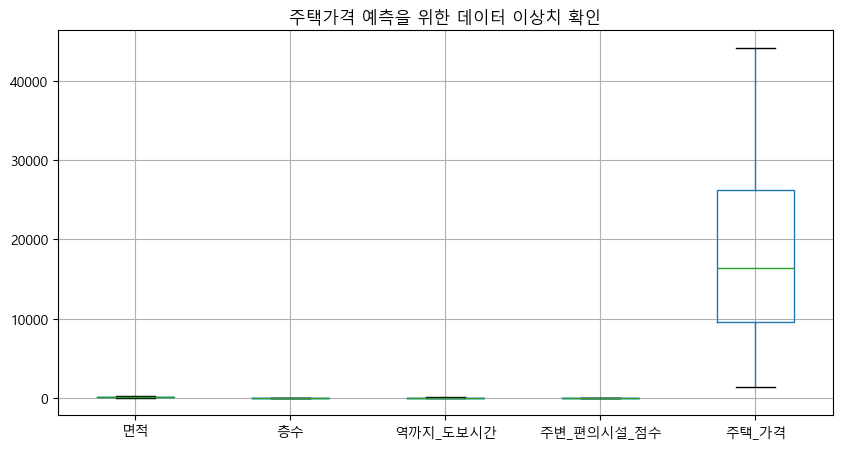

In [8]:
### boxplot으로 이상치를 시각적으로 확인해보기
plt.figure(figsize=(10,5))
plt.title("주택가격 예측을 위한 데이터 이상치 확인")
### boxplot 그리기
df_org.boxplot()
plt.show()

In [9]:
### 중복데이터 확인해보기
df_org.duplicated().value_counts()

False    1000
Name: count, dtype: int64

### 특성들 간의 관계 확인하기

In [10]:
"""
<특성들 간의 관계 확인하기>
 - 상관관계 분석: 선형 또는 비선형 확인
 - 상관관계는 표 또는 시각적으로 확인
 - 시각화의 경우 산점행렬도(산점도 그래프)를 사용
 - 확인 방법: 종속변수를 기준으로 다른 특성들간의 관계를 확인하면 됨
 - 선형인 경우: 회귀분석 진행
 - 비선형인 경우: 분류분석 진행

<상관관계에서 사용하는 용어>
 - 표: 상관관계표
 - 시각화 그래프: 산점행렬도
 - 상관관계를 나타내는 값: 상관계수

<사용하는 함수>
 - corr(): 상관관계 표 형태로 데이터를 제공해주는 함수
"""

'\n<특성들 간의 관계 확인하기>\n - 상관관계 분석: 선형 또는 비선형 확인\n - 상관관계는 표 또는 시각적으로 확인\n - 시각화의 경우 산점행렬도(산점도 그래프)를 사용\n - 확인 방법: 종속변수를 기준으로 다른 특성들간의 관계를 확인하면 됨\n - 선형인 경우: 회귀분석 진행\n - 비선형인 경우: 분류분석 진행\n\n<상관관계에서 사용하는 용어>\n - 표: 상관관계표\n - 시각화 그래프: 산점행렬도\n - 상관관계를 나타내는 값: 상관계수\n\n<사용하는 함수>\n - corr(): 상관관계 표 형태로 데이터를 제공해주는 함수\n'

### 상관관계 표 나타내기

In [11]:
"""
(해석 방법)
 - 좌상향에서 우하향으로 대각선을 기준으로 왼쪽과 오른쪽은 대칭을 이루기에 한쪾을 기준으로 해석
 - 종속변수 특성을 기준으로 다른 특성들(독립변수들)과 비교합니다.
 - 표에 나타난 숫자값들을 "상관계수"라고 칭함
  - 상관계수 값은 "절대값"으로 해석 합니다.
  - 상관계수 값의 범위: 0~1사이의 값으로 표현되면(음수 값인 경우 - 표시)
  - 상관계수의 값이 1에 가까울수록: 관계성이 좋다고 표현
                    0에 가까울수록: 관계성이 없다고 표현
 - 상관계수 값이 음수인 경우: "음의 상관관계"라고 해석
                            : "우하향"의 선형 형태를 나타냅니다.(반비례)
 - 상관계수 값이 양수인 경우: "양의 상관관계"라고 해석
                            : "우상향"의 선형 형태를 나타냅니다.(비례)
 - 상관계수의 값이 1에 가까울수록 "기울기가 급함"
                   0에 가까울수록 "기울기가 완만함"
 - 선형 형태의 기울기가 급할수록: "선형성이 좋다 또는 선형성이 크다"고 표현
                      완만할수록: "선형성이 나쁘다 또는 선형성이 작다"고 표현## 상관관계 표: corr() 함수 사용(데이터프레임에 포함되어 있음)
"""

### 상관관계 표: corr() 함수 사용(데이터프레임에 포함되어 있음)
correlation_matrix = df_org.corr()
correlation_matrix

,면적,층수,역까지_도보시간,주변_편의시설_점수,주택_가격
면적,1.000000,0.058629,-0.025361,0.050418,0.963063
층수,0.058629,1.000000,-0.029001,-0.013287,0.229850
역까지_도보시간,-0.025361,-0.029001,1.000000,-0.003508,-0.117005
주변_편의시설_점수,0.050418,-0.013287,-0.003508,1.000000,0.091508
주택_가격,0.963063,0.229850,-0.117005,0.091508,1.000000


### 상관관계 매트릭스 히트맵 그리기

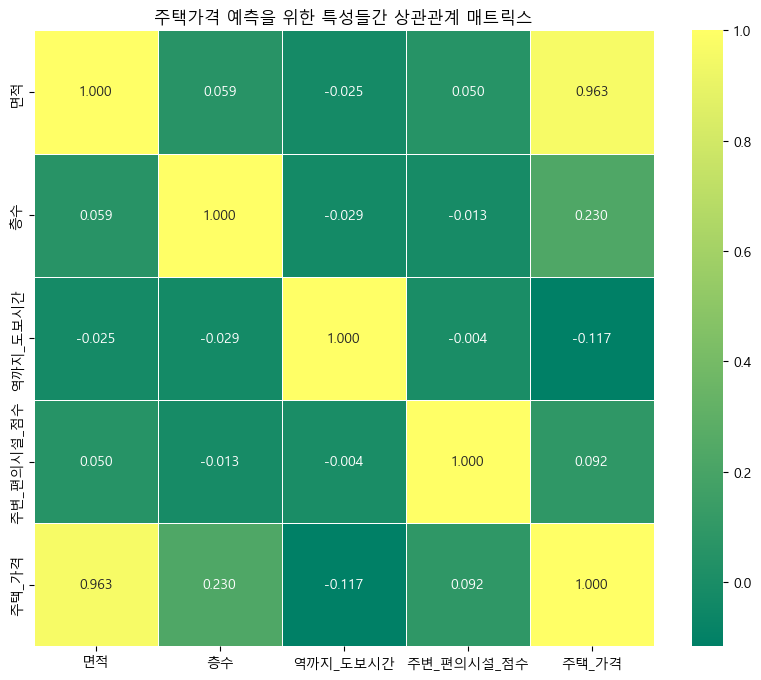

In [12]:
plt.figure(figsize=(10,8))
plt.title("주택가격 예측을 위한 특성들간 상관관계 매트릭스")

sns.heatmap(correlation_matrix, annot=True, fmt=".3f", cmap="summer", linewidths=0.5)

plt.show()

### 산점행렬도 그리기

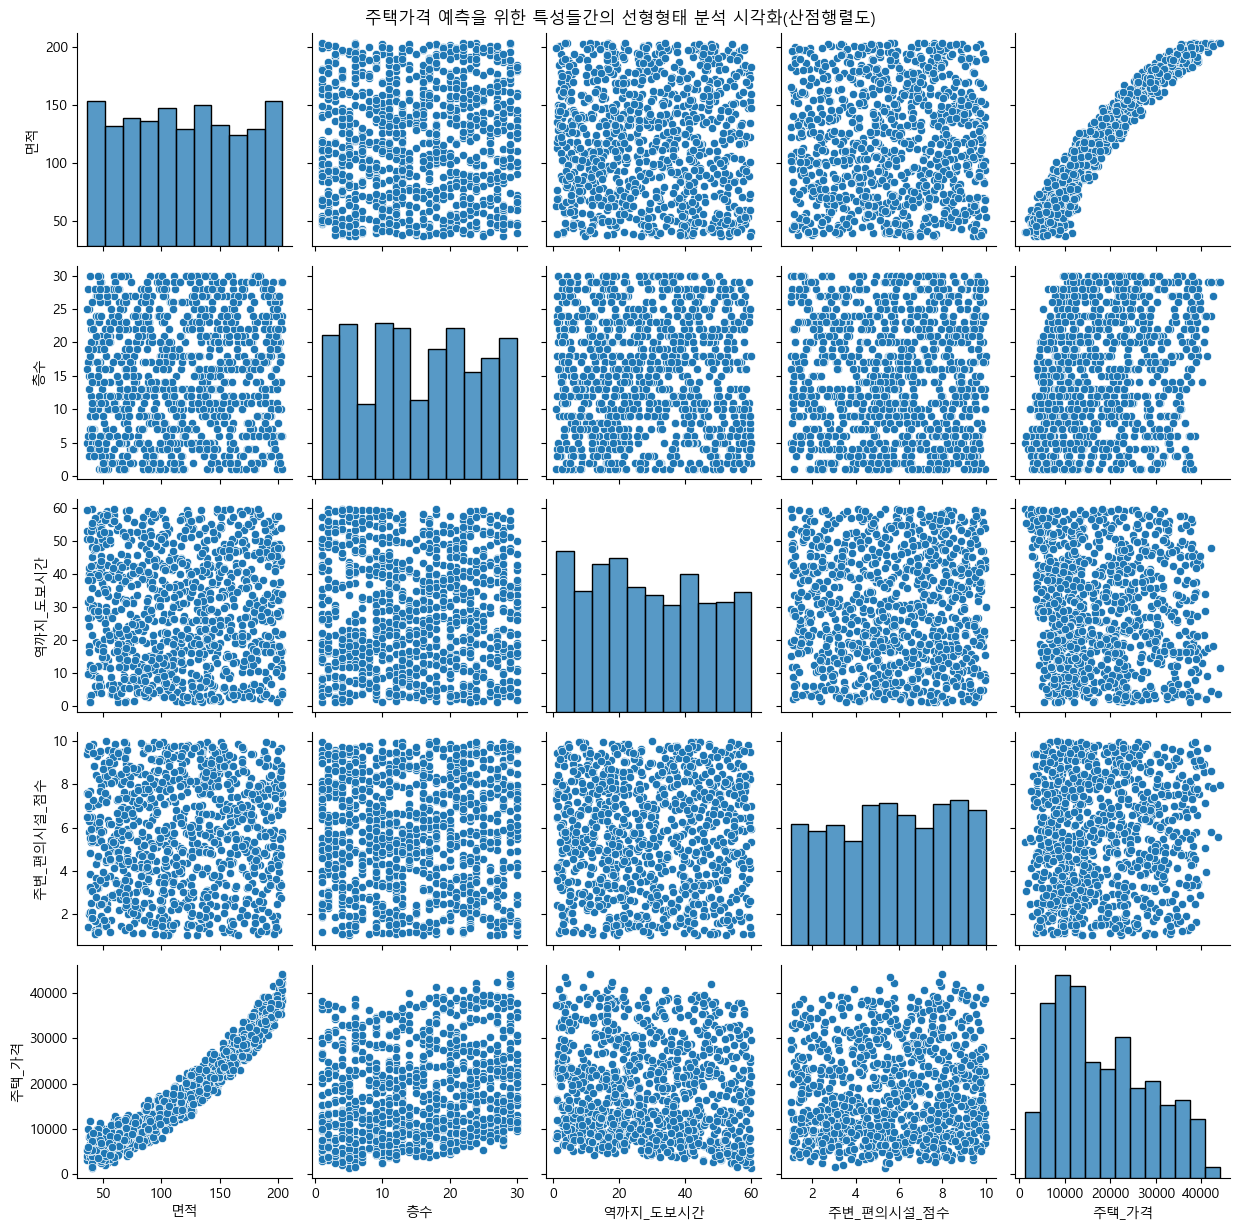

In [13]:
### 산점행렬도: 모든 특성들간의 관계를 산점도로 표현한 그래프
# - 사용 그래프: pairplot() 함수 사용
# - 원본 데이터 사용
sns.pairplot(df_org)
plt.suptitle("주택가격 예측을 위한 특성들간의 선형형태 분석 시각화(산점행렬도)")
plt.tight_layout()
plt.show()

### (해석)
# - 주택가격을 기준으로 면적, 층수, 도보시간, 편의시설점수 각각의
#   특성간의 선형관계를 확인한 결과
# - 면적간의 관계는 매우 높은 우상향 관계를 나타내고 있으며,
# - 편의시설점수간의 관계의 경우에는 매우 낮은 우상향 관계를 나타내고 있음
# - 주택가격을 예측하기 위한 특성들로 면적, 층수, 도보시간. 편의시설점수를 이용하여
#   분석을 진행할 경우, 모든 관계성이 선형분포를 나타내고 있으며,
#   종속변수로 사용한 주택가격의 데이터 형태가 연속형 데이터로,
#  -> 회귀분석으로 진행하는 것을 추천함
# - 단, 편의시설점수 특성의 경우에는 관계성이 매우 낮기에 
#   우선 훈련에 적용하여 성능을 확인 후 
#   차후 훈련에서 제외한 후 성을 확인하여
#   사전/사후의 성능 결과를 확인하여 제외할지 결정하면 될 것임

### 상관관계 검증(검정) 하기 -> 유의미성(p_value)확인

In [14]:
# 상관관계 검증(검정)을 위해서는 독립변수와 종속변수로 특성을 분리해야함
# - 독립변수 : 면적, 층수, 역까지_도보시간, 주변_편의시설_점수
# - 종속변수 : 주택_가격

In [15]:
### 독립변수와 종속변수로 분리하기
# 독립변수명: X(대문자)
X = df_org.iloc[:, :-1]
X

,면적,층수,역까지_도보시간,주변_편의시설_점수
0,121.146284,13,35.025575,9.100563
1,69.040391,27,21.442580,2.792623
2,153.858939,8,10.174919,2.803478
3,71.656510,20,48.844439,1.983254
4,177.556747,4,2.466979,4.395939
...,...,...,...,...
995,109.964997,7,47.173178,7.412281
996,37.051580,19,38.339751,7.545630
997,69.009828,27,1.159038,3.559802
998,132.588140,23,15.994720,1.331994


In [16]:
# 종속변수명: y(소문자)
y = df_org["주택_가격"]
y

0      16601.167450
1      11420.654974
2      23286.484864
3       7535.429045
4      29848.361648
           ...     
995    12116.676007
996     6035.386052
997    12017.803413
998    20958.547577
999    14265.164818
Name: 주택_가격, Length: 1000, dtype: float64

In [17]:
"""
<상관관계 검증(검정) 방법>
 1. 스피어만(Spearman) 상관관계 검정
  - 선형 또는 비선형 관계를 모두 포함하여 검정 가능
  - 보통 순위 형태의 데이터 특성(종속변수와 독립변수 각각) 간의 관계 확인에 사용
  - 예시: 시험 성적과 학업 성취도 간의 관계인 경우
          (시험 성적이 높을 수록, 학업 성취도도 높아질까?)
          
 2. 피어슨(Pearson) 상관관계 검정
  - 선형 형태를 띄는 경우에 주로 사용되는 방법(비선형에서도 사용되기는 합니다.)
  - 일반적으로 주로 사용되는 방법임
  - 보통 양적 크기 형태의 데이터 특성(종속변수와 독립변수 각각) 간의 관계 확인에 사용
  - 예시: 온도와 아이스크림 판매량 간의 관계인 경우
          (날씨가 더우면, 아이스크림 판매량이 증가할까?)
"""

'\n<상관관계 검증(검정) 방법>\n 1. 스피어만(Spearman) 상관관계 검정\n  - 선형 또는 비선형 관계를 모두 포함하여 검정 가능\n  - 보통 순위 형태의 데이터 특성(종속변수와 독립변수 각각) 간의 관계 확인에 사용\n  - 예시: 시험 성적과 학업 성취도 간의 관계인 경우\n          (시험 성적이 높을 수록, 학업 성취도도 높아질까?)\n          \n 2. 피어슨(Pearson) 상관관계 검정\n  - 선형 형태를 띄는 경우에 주로 사용되는 방법(비선형에서도 사용되기는 합니다.)\n  - 일반적으로 주로 사용되는 방법임\n  - 보통 양적 크기 형태의 데이터 특성(종속변수와 독립변수 각각) 간의 관계 확인에 사용\n  - 예시: 온도와 아이스크림 판매량 간의 관계인 경우\n          (날씨가 더우면, 아이스크림 판매량이 증가할까?)\n'

In [18]:
"""
<상관관계 검증(검증) 개념>
 - 상관관계 검증은 종속변수와 독립변수 각각 간에 "유의미성"이 있는지 확인하는 절차임
 - 통계적 기법(통계학 이론으로 사용됩니다.
 - 유의미성을 나타내는 이름: p-value
 - p-value의 값을: "유의미 계수"라고 칭함

<유의미 계수(p-value) 기준 해석(통상적인 통계학 기준으로 작성)>
 1. p-value < 0.05 인 경우
  - "유의미 함"이라고 해석
  - 기무가설 기각, 대립가설을 채택하는 기준이 됨
  - 기무가설은 기존 이론, 대립가설은 새로운 이론
  - 새로운 이론, 즉 대립가설이 채택되어야만 연구 진행이 가능함
 
 2. p_value >= 0.05 인 경우
  - "유의미 하지 않음" 이라고 해석
  - 기무가설 채택, 대립가설 기각의 기준이 됨
  - 새로운 이론으로 연구 진행 불가, 즉 주제 변경 또는 데이터 변경이 필요함을 의미함

 3. 유의미성의 해석 방법(글쓰기 방법)
  - p-value < 0.05 인 경우 글 작성 방법
  
   (잘못된 작성 예시)
    p-value의 값이 0.05보다 작기 때문에 유의미하다고 판단됨
    
   (올바르게 작성된 예시)
    p-value < 0.05 이므로 유의미하다고 판단됨

 4. 유의미한 값의 범위 기준
  - 통계학에서는 통상적으로 0.05를 기준으로 하지만(이론상),
  - 연구하고자하는 분야에서 기존 사용된 허용치가 있다면, 그 기준을 인용하여도 됨
  - 만약 기존 연구의 허용치가 없다면, 통상적으로 0.05를 사용하지만,
    0.1 ~ 0.05 사이의 값도 사용되는 경우도 있음
  - p-value < 0.05를 달리 해석하면, 신뢰구간 95% 이내로 만족함이라고 해석하기도 함
"""

'\n<상관관계 검증(검증) 개념>\n - 상관관계 검증은 종속변수와 독립변수 각각 간에 "유의미성"이 있는지 확인하는 절차임\n - 통계적 기법(통계학 이론으로 사용됩니다.\n - 유의미성을 나타내는 이름: p-value\n - p-value의 값을: "유의미 계수"라고 칭함\n\n<유의미 계수(p-value) 기준 해석(통상적인 통계학 기준으로 작성)>\n 1. p-value < 0.05 인 경우\n  - "유의미 함"이라고 해석\n  - 기무가설 기각, 대립가설을 채택하는 기준이 됨\n  - 기무가설은 기존 이론, 대립가설은 새로운 이론\n  - 새로운 이론, 즉 대립가설이 채택되어야만 연구 진행이 가능함\n \n 2. p_value >= 0.05 인 경우\n  - "유의미 하지 않음" 이라고 해석\n  - 기무가설 채택, 대립가설 기각의 기준이 됨\n  - 새로운 이론으로 연구 진행 불가, 즉 주제 변경 또는 데이터 변경이 필요함을 의미함\n\n 3. 유의미성의 해석 방법(글쓰기 방법)\n  - p-value < 0.05 인 경우 글 작성 방법\n  \n   (잘못된 작성 예시)\n    p-value의 값이 0.05보다 작기 때문에 유의미하다고 판단됨\n    \n   (올바르게 작성된 예시)\n    p-value < 0.05 이므로 유의미하다고 판단됨\n\n 4. 유의미한 값의 범위 기준\n  - 통계학에서는 통상적으로 0.05를 기준으로 하지만(이론상),\n  - 연구하고자하는 분야에서 기존 사용된 허용치가 있다면, 그 기준을 인용하여도 됨\n  - 만약 기존 연구의 허용치가 없다면, 통상적으로 0.05를 사용하지만,\n    0.1 ~ 0.05 사이의 값도 사용되는 경우도 있음\n  - p-value < 0.05를 달리 해석하면, 신뢰구간 95% 이내로 만족함이라고 해석하기도 함\n'

### 1. 스피어만(Spearman) 상관관계 검정

In [19]:
### 라이브러리 정의}
# - scipy: 싸이파이 라고 읽습니다.
from scipy.stats import spearmanr

In [20]:
### 독립변수의 특성 이름 추출하기
# 독립변수 각각에 대한 상관관계 검증을 해야하기에 편의성을 위해서 이름 추출
x_columns_nm = X.columns
x_columns_nm

Index(['면적', '층수', '역까지_도보시간', '주변_편의시설_점수'], dtype='object')

In [21]:
### 독립변수 "면적"과 종속변수 "주택가격"과의 상관관계 검증(유의미성 확인)
X[x_columns_nm[0]]

spearmanr(X[x_columns_nm[0]], y)

### (해석)
# - 결과값: 상관관계 계수(statistic), 유의미계수(pvalue)
# - 해석: 독립변수 "면적"과 종속변수 "주택가격" 간의 스피어만 상관관계 검증 결과
#         p-value의 값이 0.0을 나타내고 있음
#         이는 p-value < 0.05 만족하므로 유의미한 특성으로 판단됨

SignificanceResult(statistic=0.9704259944259946, pvalue=0.0)

In [22]:
### 모든 독립변수 각각에 대하여 종속변수와의 상관관계 유의미성을 확인해주세요.
# 반복 수행
# 출력결과: 상관계수, pvalue, 유의미 여부 판단.
for col in x_columns_nm:
    stat, p_value = spearmanr(X[col], y)
    p_msg = "유의미 하지 않음"

    if p_value < 0.5 :
        p_msg = "유의미 함"


    msg = f"""
    독립변수({col})와 종속변수(주택가격)의 상관관계 계수는 {stat:.3f}이고, 
    p-value의 값은 {p_value}임. 따라서 p-value < 0.05에 대하여 {p_msg}
    """

    print(msg)


    독립변수(면적)와 종속변수(주택가격)의 상관관계 계수는 0.970이고, 
    p-value의 값은 0.0임. 따라서 p-value < 0.05에 대하여 유의미 함
    

    독립변수(층수)와 종속변수(주택가격)의 상관관계 계수는 0.238이고, 
    p-value의 값은 2.2746428197022757e-14임. 따라서 p-value < 0.05에 대하여 유의미 함
    

    독립변수(역까지_도보시간)와 종속변수(주택가격)의 상관관계 계수는 -0.131이고, 
    p-value의 값은 3.348348871054102e-05임. 따라서 p-value < 0.05에 대하여 유의미 함
    

    독립변수(주변_편의시설_점수)와 종속변수(주택가격)의 상관관계 계수는 0.091이고, 
    p-value의 값은 0.0038328936712809358임. 따라서 p-value < 0.05에 대하여 유의미 함
    


In [23]:
### 모든 독립변수 각각에 대하여 종속변수와의 상관관계 유의미성을 확인해주세요.
# 반복 수행
# 출력결과: 상관계수, pvalue, 유의미 여부 판단.
for col in x_columns_nm:
    stat, p_value = spearmanr(X[col], y)

    print(f"상관계수{stat}")
    print(f"p-value{p_value}")

    if p_value < 0.5 :
        print(f"p_value의 값이 {p_value} < 0.05 를 만족하므로 유의미한 특성으로 판단됩니다.")

    else :
        print(f"p_value의 값이 {p_value} < 0.05 를 만족하지 않으므로 유의미한 특성으로 판단되지 않습니다.")


    print("-----------")

상관계수0.9704259944259946
p-value0.0
p_value의 값이 0.0 < 0.05 를 만족하므로 유의미한 특성으로 판단됩니다.
-----------
상관계수0.23822446242265483
p-value2.2746428197022757e-14
p_value의 값이 2.2746428197022757e-14 < 0.05 를 만족하므로 유의미한 특성으로 판단됩니다.
-----------
상관계수-0.1307830787830788
p-value3.348348871054102e-05
p_value의 값이 3.348348871054102e-05 < 0.05 를 만족하므로 유의미한 특성으로 판단됩니다.
-----------
상관계수0.09136329136329137
p-value0.0038328936712809358
p_value의 값이 0.0038328936712809358 < 0.05 를 만족하므로 유의미한 특성으로 판단됩니다.
-----------


### 2. 피어슨(Pearson 상관관계 검정)

In [24]:
### 라이브러리 정의
from scipy.stats import pearsonr

In [25]:
### 독립변수 "면적"과 종속변수 "주택가격"과의 상관관계 검증(유의미성 확인)
pearsonr(X[x_columns_nm[0]], y)

### (해석)
# - 결과값: 상관관계 계수(statistic), 유의미계수(pvalue)
# - 해석: 독립변수 "면적"과 종속변수 "주택가격" 간의 스피어만 상관관계 검증 결과
#         p-value의 값이 0.0을 나타내고 있음
#         이는 p-value < 0.05 만족하므로 유의미한 특성으로 판단됨

PearsonRResult(statistic=0.9630633126017953, pvalue=0.0)

In [26]:
### 모든 독립변수 각각에 대하여 종속변수와의 상관관계 유의미성을 확인해주세요.
# 반복 수행
# 출력결과: 상관계수, pvalue, 유의미 여부 판단.
for col in x_columns_nm:
    stat, p_value = pearsonr(X[col], y)

    p_msg = "유의미 하지 않음"

    if p_value < 0.5 :
        p_msg = "유의미 함"


    msg = f"""
    독립변수({col})와 종속변수(주택가격)의 상관관계 계수는 {stat:.3f}이고, 
    p-value의 값은 {p_value}임. 따라서 p-value < 0.05 에 대하여 {p_msg}
    """

    print(msg)


    독립변수(면적)와 종속변수(주택가격)의 상관관계 계수는 0.963이고, 
    p-value의 값은 0.0임. 따라서 p-value < 0.05 에 대하여 유의미 함
    

    독립변수(층수)와 종속변수(주택가격)의 상관관계 계수는 0.230이고, 
    p-value의 값은 1.864710516622709e-13임. 따라서 p-value < 0.05 에 대하여 유의미 함
    

    독립변수(역까지_도보시간)와 종속변수(주택가격)의 상관관계 계수는 -0.117이고, 
    p-value의 값은 0.0002087983584937911임. 따라서 p-value < 0.05 에 대하여 유의미 함
    

    독립변수(주변_편의시설_점수)와 종속변수(주택가격)의 상관관계 계수는 0.092이고, 
    p-value의 값은 0.0037770587718518912임. 따라서 p-value < 0.05 에 대하여 유의미 함
    


### 훈련 : 검증 : 데스트 데이터로 분류하기

In [27]:
### 훈련 : 검증 : 테스트 = 6 : 2 : 2 비율로 분류하기
# <사용 변수명>
# - 훈련 독립변수 / 종속변수 = X_train / y_train
# - 검증 독립변수 / 종속변수 = X_val / y_val
# - 테스트 독립변수 / 종속변수 = X_test / y_test

### (1단계 분류) 1000건 기준 -> 6 : 4 = 600건 : 400건
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

### (2단계 분류)  400건 기준 -> 5 : 5 = 200건 : 200건
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

print(f"훈련 독립변수/종속변수{X_train.shape}/{y_train.shape}")
print(f"검증 독립변수/종속변수{X_val.shape}/{y_val.shape}")
print(f"테스트 독립변수/종속변수{X_test.shape}/{y_test.shape}")

훈련 독립변수/종속변수(600, 4)/(600,)
검증 독립변수/종속변수(200, 4)/(200,)
테스트 독립변수/종속변수(200, 4)/(200,)


In [28]:
X_train

### 독립변수 각각의 값의 크기가 각기 다름(차이가 많음)
# - 스케일링 처리 후 훈련 진행

,면적,층수,역까지_도보시간,주변_편의시설_점수
24,147.720055,4,59.010382,8.423662
467,133.571978,18,36.130658,4.101974
539,76.228306,12,1.370025,4.171999
531,203.171102,18,9.040463,9.712274
618,118.390829,1,2.815335,4.943583
...,...,...,...,...
106,197.975016,25,53.018982,4.555207
270,126.034619,26,2.872185,5.268457
860,73.881485,29,36.328410,2.154055
435,148.191325,27,51.923694,9.518856


### 스케일링 처리하기(전처리)

In [29]:
### Standard 스케일링으로 처리
# - 각 독립변수 변수명: X_train_scaled, X_val_scaled, X_test_scaled
ss = StandardScaler()

ss.fit(X_train)

X_train_scaled = ss.transform(X_train)
X_val_scaled = ss.transform(X_val)
X_test_scaled = ss.transform(X_test)

print(X_train_scaled.shape, y_train.shape)
print(X_val_scaled.shape, y_val.shape)
print(X_test_scaled.shape, y_test.shape)

(600, 4) (600,)
(200, 4) (200,)
(200, 4) (200,)


In [30]:
X_train_scaled

array([[ 0.56166844, -1.27923821,  1.76614552,  1.009849  ],
       [ 0.27606101,  0.32698017,  0.43473043, -0.67000955],
       [-0.88153652, -0.36139913, -1.58805752, -0.64279066],
       ...,
       [-0.92891185,  1.58900889,  0.44623805, -1.42717403],
       [ 0.57118197,  1.35954913,  1.35375755,  1.43555571],
       [ 1.16051318,  0.21225029, -0.7527668 ,  0.41443365]])

### 모델 훈련하기

##### 사용할 모델 라이브러리 정의

In [ ]:
#

### 선형회귀 모델로 샘플링하기

In [32]:
### 모델 생성 및 훈련 후
# - 정확도(결정계수) 확인 및 과적합 여부 판단
# - 검증 및 테스트 데이터로 예측 후 검증 및 테스트 평가 각각 진행
lr = LinearRegression()

lr.fit(X_train_scaled, y_train)

train_score = lr.score(X_train_scaled, y_train)
val_score = lr.score(X_val_scaled, y_val)

print(f"훈련: {train_score}, 검증: {val_score}, 과적합 여부: {train_score - val_score}")

print("---------- mean_absolute_error ----------")

train_pred = lr.predict(X_train_scaled)
train_mae = mean_absolute_error(y_train, train_pred)
print(f"훈련 데이터 평균절대오차: {train_mae}")

val_pred = lr.predict(X_val_scaled)
val_mae = mean_absolute_error(y_val, val_pred)
print(f"검증 데이터 평균절대오차: {val_mae}")

test_pred = lr.predict(X_test_scaled)
test_mae = mean_absolute_error(y_test, test_pred)
print(f"테스트 데이터 평균절대오차: {test_mae}")

print("---------- mean_squared_error ----------")

train_pred = lr.predict(X_train_scaled)
train_mse = mean_squared_error(y_train, train_pred)
print(f"훈련 데이터 평균제곱오차: {train_mse}")

val_pred = lr.predict(X_val_scaled)
val_mse = mean_squared_error(y_val, val_pred)
print(f"검증 데이터 평균제곱오차: {val_mse}")

test_pred = lr.predict(X_test_scaled)
test_mse = mean_squared_error(y_test, test_pred)
print(f"테스트 데이터 평균제곱오차: {test_mse}")

print("--------------- r2_score ---------------")

train_pred = lr.predict(X_train_scaled)
train_r2 = r2_score(y_train, train_pred)
print(f"훈련 데이터 결정계수: {train_r2}")

val_pred = lr.predict(X_val_scaled)
val_r2 = r2_score(y_val, val_pred)
print(f"검증 데이터 결정계수: {val_r2}")

test_pred = lr.predict(X_test_scaled)
test_r2 = r2_score(y_test, test_pred)
print(f"테스트 데이터 결정계수: {test_r2}")


###  score()함수와 r2_score()는 함수 이름만 다를 뿐 결정계수를 반환하는 함수임

### 모델 이름 추출하기
lr.__class__.__name__

훈련: 0.9669915339286245, 검증: 0.9663244451203649, 과적합 여부: 0.0006670888082596083
---------- mean_absolute_error ----------
훈련 데이터 평균절대오차: 1612.6160152570244
검증 데이터 평균절대오차: 1610.2548316725683
테스트 데이터 평균절대오차: 1598.3470957969264
---------- mean_squared_error ----------
훈련 데이터 평균제곱오차: 3589679.6378047992
검증 데이터 평균제곱오차: 3457107.8590260316
테스트 데이터 평균제곱오차: 3464239.741108231
--------------- r2_score ---------------
훈련 데이터 결정계수: 0.9669915339286245
검증 데이터 결정계수: 0.9663244451203649
테스트 데이터 결정계수: 0.9692631447669035


'LinearRegression'

### 전체 7개 모델 반복으로 훈련 수행하기

In [33]:
### 출력결과: "모델이름, train_mae, val_mae, train_r2, val_r2, 과적합여부"

In [34]:
lr_reg = LinearRegression()
ridge  = Ridge()
lasso  = Lasso()
rf_reg = RandomForestRegressor()
et_reg = ExtraTreesRegressor()
gb_reg = GradientBoostingRegressor()
hb_reg = HistGradientBoostingRegressor()
xg_reg = XGBRegressor()

models = [
    lr_reg, ridge, lasso, rf_reg, et_reg, gb_reg, hb_reg, xg_reg
     ]

for model in models:

    model.fit(X_train_scaled, y_train)

    train_score = model.score(X_train_scaled, y_train)
    val_score = model.score(X_val_scaled, y_val)

    print(f"================{model.__class__.__name__}===============")
    print(f"훈련: {train_score}, 검증: {val_score}")

    train_pred = model.predict(X_train_scaled)
    val_pred   = model.predict(X_val_scaled)
        
    print("---------- mean_absolute_error ----------")

    train_mae = mean_absolute_error(y_train, train_pred)
    val_mae   = mean_absolute_error(y_val, val_pred)
    
    print(f"훈련 데이터 평균절대오차: {train_mae}")
    print(f"검증 데이터 평균절대오차: {val_mae}")

    print("--------------- r2_score ---------------")

    train_r2 = r2_score(y_train, train_pred)
    val_r2   = r2_score(y_val, val_pred)
    
    print(f"훈련 데이터 결정계수: {train_r2}")
    print(f"검증 데이터 결정계수: {val_r2}")


    print("--------------- 유의미 판단 ---------------")
    if train_score - val_score < 0.05:
        print(f"p_value {round(train_r2 - val_r2, 4)} < 0.05 이므로 유의미하다고 판단됨")

    else :
        print(f"p_value {round(train_r2 - val_r2, 4)} > 0.05 이므로 무의미하다고 판단됨")
        
    print("")

================LinearRegression===============
훈련: 0.9669915339286245, 검증: 0.9663244451203649
---------- mean_absolute_error ----------
훈련 데이터 평균절대오차: 1612.6160152570244
검증 데이터 평균절대오차: 1610.2548316725683
--------------- r2_score ---------------
훈련 데이터 결정계수: 0.9669915339286245
검증 데이터 결정계수: 0.9663244451203649
--------------- 유의미 판단 ---------------
p_value 0.0007 < 0.05 이므로 유의미하다고 판단됨

================Ridge===============
훈련: 0.9669889579627101, 검증: 0.9663378313229343
---------- mean_absolute_error ----------
훈련 데이터 평균절대오차: 1612.8486746871988
검증 데이터 평균절대오차: 1610.011435742483
--------------- r2_score ---------------
훈련 데이터 결정계수: 0.9669889579627101
검증 데이터 결정계수: 0.9663378313229343
--------------- 유의미 판단 ---------------
p_value 0.0007 < 0.05 이므로 유의미하다고 판단됨

================Lasso===============
훈련: 0.9669914980638333, 검증: 0.9663282336733447
---------- mean_absolute_error ----------
훈련 데이터 평균절대오차: 1612.6148201286808
검증 데이터 평균절대오차: 1610.1448274268544
--------------- r2_score ---------------
훈련 

In [35]:
"""
(해석)
 - 주택가격을 예측하기 위해 8개의 모델로 훈련과 평가를 수행한 결과는 다음과 같습니다:
  - 과소적합이 발생한 모델은 3개입니다. 이들 모델은 훈련과 검증 성능이 거의 동일하며, 
    훈련 정확도와 검증 정확도가 거의 차이가 나지 않음을 확인할 수 있습니다. 
    즉, 모델이 훈련 데이터를 제대로 학습하지 못했거나 검증 데이터를 잘 일반화하지 못한 경우입니다.
  - 과대적합이 발생한 모델은 RandomForestRegressor와 ExtraTreesRegressor입니다. 
    이 모델들은 훈련 정확도가 1에 가까운 값을 보였으며, 검증과 테스트 데이터에서 성능이 급격히 떨어졌습니다. 
    이는 훈련 데이터에 과도하게 적합된 결과로, 일반화 성능이 떨어지는 문제입니다.
  - 나머지 4개의 모델 (LinearRegression, Ridge, Lasso, GradientBoostingRegressor)은 훈련과 검증 성능 차이가 0.002~0.004로 미세한 차이를 보이며, 
    모두 일반화가 잘 된 모델입니다. 이들 모델은 훈련 데이터와 검증 데이터에서 모두 비슷한 성능을 보였으며, 
    성능 차이가 미미하여 매우 우수한 일반화 성능을 가진 모델로 평가됩니다.
  - 훈련 및 검증의 결정계수 (R²) 값은 대체로 0.996 이상으로 매우 높은 값을 보였으며, 
    훈련과 검증 성능 차이가 거의 없는 모델들이 다수입니다. 
    이는 모델들이 훈련 데이터에 잘 적합하면서도 검증 데이터에 대해 우수한 성능을 보였음을 의미합니다.
  - 훈련 정확도와 검증 정확도 간 차이가 0.05 이하인 모델들이 대부분으로, 일반화가 잘 된 모델들로 판단됩니다.
  - 그 중에서, 훈련 정확도가 가장 높고, 가장 일반화가 잘 된 모델은 GradientBoostingRegressor입니다. 
    이 모델은 훈련과 검증에서 모두 높은 성능을 보였으며, 결정계수(R²)와 평균절대오차(MAE)가 매우 우수하게 나타났습니다. 
    따라서, 이 모델을 최종 예측 모델로 선택하여 주택가격 예측을 진행하고자 합니다.
"""

'\n(해석)\n - 주택가격을 예측하기 위해 8개의 모델로 훈련과 평가를 수행한 결과는 다음과 같습니다:\n  - 과소적합이 발생한 모델은 3개입니다. 이들 모델은 훈련과 검증 성능이 거의 동일하며, \n    훈련 정확도와 검증 정확도가 거의 차이가 나지 않음을 확인할 수 있습니다. \n    즉, 모델이 훈련 데이터를 제대로 학습하지 못했거나 검증 데이터를 잘 일반화하지 못한 경우입니다.\n  - 과대적합이 발생한 모델은 RandomForestRegressor와 ExtraTreesRegressor입니다. \n    이 모델들은 훈련 정확도가 1에 가까운 값을 보였으며, 검증과 테스트 데이터에서 성능이 급격히 떨어졌습니다. \n    이는 훈련 데이터에 과도하게 적합된 결과로, 일반화 성능이 떨어지는 문제입니다.\n  - 나머지 4개의 모델 (LinearRegression, Ridge, Lasso, GradientBoostingRegressor)은 훈련과 검증 성능 차이가 0.002~0.004로 미세한 차이를 보이며, \n    모두 일반화가 잘 된 모델입니다. 이들 모델은 훈련 데이터와 검증 데이터에서 모두 비슷한 성능을 보였으며, \n    성능 차이가 미미하여 매우 우수한 일반화 성능을 가진 모델로 평가됩니다.\n  - 훈련 및 검증의 결정계수 (R²) 값은 대체로 0.996 이상으로 매우 높은 값을 보였으며, \n    훈련과 검증 성능 차이가 거의 없는 모델들이 다수입니다. \n    이는 모델들이 훈련 데이터에 잘 적합하면서도 검증 데이터에 대해 우수한 성능을 보였음을 의미합니다.\n  - 훈련 정확도와 검증 정확도 간 차이가 0.05 이하인 모델들이 대부분으로, 일반화가 잘 된 모델들로 판단됩니다.\n  - 그 중에서, 훈련 정확도가 가장 높고, 가장 일반화가 잘 된 모델은 GradientBoostingRegressor입니다. \n    이 모델은 훈련과 검증에서 모두 높은 성능을 보였으며, 결정계수(R²)와 평균절대오차(MAE)가 매우 우수하

### 여러 모델들 중 선정된 모델로 예측 및 최종 평가하기

In [36]:
### 선정된 모델로 예측하기
test_pred = gb_reg.predict(X_test_scaled)

### 평가(MAE, MSE, R2_score)하기
mae = mean_absolute_error(y_test, test_pred)
mse = mean_squared_error(y_test, test_pred)
r2  = r2_score(y_test, test_pred)

print(f"선정모델:{gb_reg.__class__.__name__}")
print(f"MAE 평균절대오차: {mae}")
print(f"MSE 평균제곱오차: {mse}")
print(f"R2 결정계수: {r2}")

### 최종해석
# - 선정된 GradientBoosting의 예측 평가 결과
# - 평균절대오차 (MAE):
#  - MAE는 예측값과 실제값 간의 차이를 절대값으로 평균한 것입니다. 즉, 모델의 예측값이 실제 주택가격과 얼마나 차이가 나는지를 나타냅니다.
#  - 주어진 MAE 값 477.47은 모델이 예측한 주택가격과 실제 주택가격의 평균적인 차이가 약 477만원이라는 의미입니다. 
#  - 이는 예측값과 실제값 사이에 약간의 오차가 있음을 의미하지만, 오차가 크지 않아서 예측 성능이 상당히 우수한 것으로 판단할 수 있습니다.

# - 평균제곱오차 (MSE):
#  - MSE는 예측값과 실제값 간의 차이를 제곱한 후 평균을 낸 값으로, 큰 오차에 더 큰 패널티를 부여합니다. MSE 값이 클수록 예측의 정확도가 낮음을 나타냅니다.
#  - 주어진 MSE 값 340,434.27은 예측 오차가 평균적으로 얼마나 큰지에 대한 정보를 제공하며, 주택가격 예측에서 큰 오차가 다소 존재할 수 있음을 시사합니다. 
#    하지만 MSE 값만 보고 예측의 성능을 평가하기보다는 MAE나 R²와 함께 종합적으로 해석하는 것이 중요합니다.

# - 결정계수 (R²):
#  - R² 값은 모델이 데이터를 얼마나 잘 설명하는지를 나타냅니다. R² 값이 1에 가까울수록 모델이 실제 데이터를 잘 설명하고 있다는 의미입니다.
#  - 주어진 R² 값 0.99698는 모델이 주택가격을 거의 완벽하게 예측하고 있다는 것을 의미합니다. 
#    실제로, R² 값이 0.99698라는 것은 모델이 약 99.7%의 변동성을 잘 설명하고 있음을 보여줍니다. 
#    이는 매우 높은 성능을 나타내며, 예측 모델의 신뢰도가 높다는 것을 의미합니다.

# - 결론
# - 모델의 성능은 매우 우수한 것으로 평가됩니다. MAE가 477만원 정도로 비교적 낮고, R² 값이 0.997에 가까워 예측이 매우 정확하다는 것을 알 수 있습니다. 
#   MSE 값도 다소 높지만, 이는 큰 오차가 있었음을 시사하지만, 전반적으로 예측 성능이 매우 좋다고 판단할 수 있습니다.
# - 이 모델은 주택가격 예측에서 매우 신뢰할 수 있는 모델로, 실제 주택가격과의 차이가 매우 적고, 예측이 실제 데이터와 잘 일치한다는 것을 알 수 있습니다.

### 수업 해석
# - 선정된 GradientBoosting의 예측 평가 결과
#  - 결정계수는 0.997는, MAE는 477는 평가 되었음
#  - 결정계수는 훈련 > 검증 > 테스트의 결과로 가장 이상적인 모델 성능을 발휘하고 있으며,
#  - 오차의 경우에도 검증 오차보다 작은 허용버뮈 내의 오차로 판단됨
# - 따라서, 면적, 층수, 역까지_도보시간, 주변편의시설_점수의 독립변수로,
#   주택가격을 예측하는 모델로 GradientBoosting 모델 사용 가능
# - 오차 허용 범위는 검증오차와 테스트오차의 범위로 판단할 수 있으며,
#   약 (+-)477의 오차가 발생할 수 있음
# - GradientBoosting 모델은 훈련 결정계수 약0.997로 설명력(결정력, 설득력)이 매우 좋은
#   훌률한 모델로 판단됨

선정모델:GradientBoostingRegressor
MAE 평균절대오차: 476.7549286972675
MSE 평균제곱오차: 339521.32955696876
R2 결정계수: 0.9969875589638602


### 하이퍼파라미터 튜닝

In [37]:
"""
<하이퍼파라미터 튜닝 개념>
 - 모델의 성능에 영향을 미치는 속성값, 즉 파라미터의 값을 사람이 관여하여 변경하는 것
 - 사람의 개입이 필요한 부분임
 - 일반적으로최초 훈련시에는 기본값(default)을 사용하여 훈련 진행
 - "기본값을 이용한 훈련 평가결과를 기준"으로 성능이 안좋은 경우 추가적으로 진행하는 절차임
 - 하이퍼파라미터의 값을 수정할 때는 직접 수정하면서 가장 성능이 좋을 때의 값을 찾을 수도 있지만,
  -> ** 자동으로 하이퍼파라미터의 값을 찾아주는 라이브러리를 이용하는 경우가 많음
  -> 라이브러리를 이용할 경우: 하이퍼파라미터에 사용할 값 한개가 아닌, 값의 범위를 넣어서 사용
  -> 하이퍼파라미터 값의 범위를 정의할 때는 "리스트 타입"으로 정의

<하이퍼파라미터 라이브러리>
 - 패키지: sklearn.model_selection
 - 튜닝모델(클래스): GridSearchCV()

<GridSearchCV()>
 - 모델에 대한 하이퍼파라미터의 속성 값들을 스스로 찾아서 훈련까지 수행합니다.
 - 하이퍼파라미터로 정의한 값의 범위 값들을 이용해서 스스로 훈련을 하면서
   값들마다 훈련 후 성능비교를 스스로 수행한 후 가장 성능이 좋을 때의 값들을 찾아 놓습니다.
 - 하이퍼파라미터의 값들로 스스로 훈련 및 검증 등 평가를 진행하기 때문에 "모델"클래스라고 칭합니다.
 - 완료된 최종 결과물은 가장 best한 모델을 반환받아서 사용할 수 있습니다.
 - best한 모델은 최적의 하이퍼파라미터 값들이 설정되어 있는 모델이 됩니다.
 - 사용되는 데이터: 훈련 독립변수와 종속변수가 사용됨
 - GridSearchCV는 내부적으로 교차검증(CV, Cross Validation)을 수행합니다.

<교차검증(CV, Cross Validation)>
 - 데이터를 자체적으로 독립변수와 종속변수의 여러 그룹으로 분리(Fold, 기본값 5개)하여 사용
 - 교차검증은 그룹으로 분리된 값들 중 독립변수와 종속변수의 값들을 교차하면서(섞으면서)
   훈련과 검증을 진행하게 됩니다.
 - 하이퍼파라미터의 범위 값들을 기준으로 각 훈련 결과를 비교하면서 검증하게 됨
 - 시간이 다소 소요될 수 있음(시스템 성능에 따라 처리 시간에 차이가 있음)
  -> 가급적 시스템 자원(CPU core의 갯수)을 최대한 전체를 사용해서 수행
"""

'\n<하이퍼파라미터 튜닝 개념>\n - 모델의 성능에 영향을 미치는 속성값, 즉 파라미터의 값을 사람이 관여하여 변경하는 것\n - 사람의 개입이 필요한 부분임\n - 일반적으로최초 훈련시에는 기본값(default)을 사용하여 훈련 진행\n - "기본값을 이용한 훈련 평가결과를 기준"으로 성능이 안좋은 경우 추가적으로 진행하는 절차임\n - 하이퍼파라미터의 값을 수정할 때는 직접 수정하면서 가장 성능이 좋을 때의 값을 찾을 수도 있지만,\n  -> ** 자동으로 하이퍼파라미터의 값을 찾아주는 라이브러리를 이용하는 경우가 많음\n  -> 라이브러리를 이용할 경우: 하이퍼파라미터에 사용할 값 한개가 아닌, 값의 범위를 넣어서 사용\n  -> 하이퍼파라미터 값의 범위를 정의할 때는 "리스트 타입"으로 정의\n\n<하이퍼파라미터 라이브러리>\n - 패키지: sklearn.model_selection\n - 튜닝모델(클래스): GridSearchCV()\n\n<GridSearchCV()>\n - 모델에 대한 하이퍼파라미터의 속성 값들을 스스로 찾아서 훈련까지 수행합니다.\n - 하이퍼파라미터로 정의한 값의 범위 값들을 이용해서 스스로 훈련을 하면서\n   값들마다 훈련 후 성능비교를 스스로 수행한 후 가장 성능이 좋을 때의 값들을 찾아 놓습니다.\n - 하이퍼파라미터의 값들로 스스로 훈련 및 검증 등 평가를 진행하기 때문에 "모델"클래스라고 칭합니다.\n - 완료된 최종 결과물은 가장 best한 모델을 반환받아서 사용할 수 있습니다.\n - best한 모델은 최적의 하이퍼파라미터 값들이 설정되어 있는 모델이 됩니다.\n - 사용되는 데이터: 훈련 독립변수와 종속변수가 사용됨\n - GridSearchCV는 내부적으로 교차검증(CV, Cross Validation)을 수행합니다.\n\n<교차검증(CV, Cross Validation)>\n - 데이터를 자체적으로 독립변수와 종속변수의 여러 그룹으로 분리(Fold, 기본값 5개)하여 사용\n - 교차검증은 그룹으로 분리된

In [38]:
### 하이퍼파라미터 튜닝 모델(클래스) 정의하기
from sklearn.model_selection import GridSearchCV

In [39]:
### 튜닝에 사용할 회귀분석 모델 정의하기
# - 튜닝모델에서 하이퍼파라미터 찾아내기 때문에,
#   튜닝에 사용할 분석 모델은 꺠끗한 상태로 생성만 합니다.
# - 튜닝 모델에 -> 사용할 분석모델을 넣어주어야 함
rf_reg = RandomForestRegressor()
rf_reg

RandomForestRegressor()

In [40]:
### 하이퍼파라미터 정의하기
# - 대표 변수는 딕셔너리로, 각 값들은 리스트로 정의

# 딕셔너리 대표 변수 정의
gridParams = {}

# - 랜덤포레스트 모델에서 훈련에 사용할 하이퍼파라미터 중 "트리의 갯수" 범위 지정
gridParams["n_estimators"] = [50, 100]

# - 랜덤포레스트 모델에서 훈련 시에 트리가 밑으로 뻗어나가는 "최대 깊이" 범위 지정
# - None : 깊이에 제한을 두지 않음(훈련 모델이 알아서 끝을 냄)
# - 예를 들어 : 깊이 값을 10을 주었을 때, 
#              훈련 모델이 10 이전에 더이상 수행할 것이 없으면 종료시킴
gridParams["max_depth"] = [None, 3, 10]

gridParams

{'n_estimators': [50, 100], 'max_depth': [None, 3, 10]}

In [41]:
### GridSearchCV 튜닝 모델에 대한 속성 정의하기
# 평가방법 정의하기: 회귀에서는 MSE, R2를 주로 정의하여 사용(또는 r2만 사용)
scoring = ["neg_mean_squared_error", "r2"]

# 모델 선정 기준 정의하기: 평가방법 중에 선정 기준으로 사용할 평가방법을 선정()
# - 회귀에서는 r2를 사용(결정계수)
refit = "r2"

### GridSearchCV 튜닝 모델에서 교차검증에 사용할 그룹(Fold)의 갯수 지정
# - 보통 사용하는 Fold 갯수: 3 또는 5 사용(더 큰값 사용가능하며, 홀수로 지정)
#   (기본값은 5)
cv = 5

# CPU Core(코어) 사용 갯수 정의하기
# -1: 시스템의 모든 코더를 사용하겠다는 의미
n_jobs = -1

In [42]:
### 튜닝 모델(클래스) 생성하기 (모델 생성과 같음)
grid_search_model = GridSearchCV(
    # 튜닝에 사용할 모델 설정
    estimator = rf_reg,
    # 위에서 정의한 하이퍼파라미터터 설정
    param_grid = gridParams,
    # 모델 평가방법 설정
    scoring = scoring,
    # 모델 선정 기준 설정
    refit = refit,
    # 교차검증에 사용할 Fold 갯수 설정
    cv = cv,
    # CPU Core(코어) 갯수 설정
    n_jobs = n_jobs
)

grid_search_model

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 3, 10], 'n_estimators': [50, 100]},
             refit='r2', scoring=['neg_mean_squared_error', 'r2'])

In [43]:
### 튜닝 모델 훈련시키기
# - 기본 모델 훈련시키는 방법과 동일
grid_search_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 3, 10], 'n_estimators': [50, 100]},
             refit='r2', scoring=['neg_mean_squared_error', 'r2'])

In [44]:
### 튜닝 결과 확인하기
# - 튜닝 결과: 최적의 모델, 최적의 결정계수값, 최적의 하이퍼파라미터 확인 가능

### 최적의 하이퍼파라미터 확인하기
best_params = grid_search_model.best_params_
print(f"최적의 하이퍼파라미터: {best_params}")

### 최적의 성능(결정계수) 확인하기
best_score = grid_search_model.best_score_
print(f"최적의 성능(결정계수): {best_score:.5f}")

### 최적의 모델 확인하기
best_model = grid_search_model.best_estimator_
print(f"최적의 모델: {best_model}")

최적의 하이퍼파라미터: {'max_depth': 10, 'n_estimators': 100}
최적의 성능(결정계수): 0.99293
최적의 모델: RandomForestRegressor(max_depth=10)


### 최적의 모델로 예측 및 평가

In [45]:
### 훈련, 검증, 테스트 데이터로 예측 및 평가 수행하기
print(f"================{best_model.__class__.__name__}===============")


train_pred = best_model.predict(X_train_scaled)
val_pred = best_model.predict(X_val_scaled)
test_pred = best_model.predict(X_test_scaled)

### 평균절대오차(MAE)
print("---------- mean_absolute_error ----------")

train_mae = mean_absolute_error(y_train, train_pred)
val_mae   = mean_absolute_error(y_val, val_pred)
test_mae  = mean_absolute_error(y_test, test_pred)

print(f"훈련 데이터 평균절대오차: {train_mae}")
print(f"검증 데이터 평균절대오차: {val_mae}")
print(f"테스트 데이터 평균절대오차: {test_mae}")


### 평균제곱오차(MSE)
print("---------- mmean_squared_error ----------")
train_mse = mean_squared_error(y_train, train_pred)
val_mse   = mean_squared_error(y_val, val_pred)
test_mse  = mean_squared_error(y_test, test_pred)

print(f"훈련 데이터 평균절대오차: {train_mse}")
print(f"검증 데이터 평균절대오차: {val_mse}")
print(f"테스트 데이터 평균절대오차: {test_mse}")

### 결정계수(R2)
print("--------------- r2_score ---------------")

train_r2 = r2_score(y_train, train_pred)
val_r2   = r2_score(y_val, val_pred)
test_r2  = r2_score(y_test, test_pred)

print(f"훈련 데이터 결정계수: {train_r2}")
print(f"검증 데이터 결정계수: {val_r2}")
print(f"테스트 데이터 결정계수: {test_r2}")

print(f"훈련: {train_score}, 검증: {val_score}")

# 결정계수 차이가 0.05 이하일 경우 유의미하다고 판단
print("-------------- 유의미 판단 --------------")
if train_r2 - val_r2 < 0.05:
    print(f"p_value {round(train_r2 - val_r2, 4)} < 0.05 이므로 유의미하다고 판단됨")

else :
    print(f"p_value {round(train_r2 - val_r2, 4)} > 0.05 이므로 무의미하다고 판단됨")

================RandomForestRegressor===============
---------- mean_absolute_error ----------
훈련 데이터 평균절대오차: 235.67513693670102
검증 데이터 평균절대오차: 573.4263724577773
테스트 데이터 평균절대오차: 652.0572470884465
---------- mmean_squared_error ----------
훈련 데이터 평균절대오차: 92210.42036292017
검증 데이터 평균절대오차: 534111.2489398831
테스트 데이터 평균절대오차: 671305.0577250964
--------------- r2_score ---------------
훈련 데이터 결정계수: 0.9991520902032812
검증 데이터 결정계수: 0.9947972428373777
테스트 데이터 결정계수: 0.9940437706629562
훈련: 0.9999966471408439, 검증: 0.995600624406841
-------------- 유의미 판단 --------------
p_value 0.0044 < 0.05 이므로 유의미하다고 판단됨


In [46]:
"""
<모델 선정 기준>
 1. 객관전 선정 기준(평가 결과값으로 구분이 가능한 경우)
  - 과소적합, 즉 훈련-검증이 마이너스(-)인 경우 제외
  - 과대적합, 훈련이 검증보다 0.1 이상 차이 나는 경우 -> 제외 볻나는 튜닝 대상
              훈련이 1인 경우 -> 제외
              검증이 1인 경우 -> 제외 보다는 체크 대상
  - 비교할 모델들의 훈련정확도 및 과적합여부의 차이가 급격하게 차이가 나는 경우
   -> 훈련정확도의 차이가 많고, 과적합여부는 차이가 없는 경우: 훈련정확도 기준으로 선정
   -> 훈련정확도의 차이가 없고, 과적합여부는 차이가 많은 경우: 과적합여부 기준으로 선정
              
 2. 주관적 선정 기준(분석가의 객관적이면서도 주관적인 판단 기준을 의미함)
  - 여러 모델 중에 1번에 대한 객관적 선정 기준을 통과한 모델들 중에서 최종 모델을 선정하게됨
  - 비교할 모델들의 훈련정확도 및 과적합여부의 차이가 거의 없는 경우
   -> 오차값(MAE or MSE)의 차이가 많이 나는 경위 오차값 기준으로 선정
   -> 오차값의 차이가 많지 않은 경우(분석가 주관에 따름)
    : 훈련정확도를 중시할 경우 훈련정확도가 높은 기준으로 선정
    : 일반화를 중시할 경우 과적합의 차이가 낮은 기준으로 선정
"""

'\n<모델 선정 기준>\n 1. 객관전 선정 기준(평가 결과값으로 구분이 가능한 경우)\n  - 과소적합, 즉 훈련-검증이 마이너스(-)인 경우 제외\n  - 과대적합, 훈련이 검증보다 0.1 이상 차이 나는 경우 -> 제외 볻나는 튜닝 대상\n              훈련이 1인 경우 -> 제외\n              검증이 1인 경우 -> 제외 보다는 체크 대상\n  - 비교할 모델들의 훈련정확도 및 과적합여부의 차이가 급격하게 차이가 나는 경우\n   -> 훈련정확도의 차이가 많고, 과적합여부는 차이가 없는 경우: 훈련정확도 기준으로 선정\n   -> 훈련정확도의 차이가 없고, 과적합여부는 차이가 많은 경우: 과적합여부 기준으로 선정\n              \n 2. 주관적 선정 기준(분석가의 객관적이면서도 주관적인 판단 기준을 의미함)\n  - 여러 모델 중에 1번에 대한 객관적 선정 기준을 통과한 모델들 중에서 최종 모델을 선정하게됨\n  - 비교할 모델들의 훈련정확도 및 과적합여부의 차이가 거의 없는 경우\n   -> 오차값(MAE or MSE)의 차이가 많이 나는 경위 오차값 기준으로 선정\n   -> 오차값의 차이가 많지 않은 경우(분석가 주관에 따름)\n    : 훈련정확도를 중시할 경우 훈련정확도가 높은 기준으로 선정\n    : 일반화를 중시할 경우 과적합의 차이가 낮은 기준으로 선정\n'

### 8개의 회귀모델 각각에 대한 최적의 모델을 이용하여 평가하기

In [47]:
### 최종 출력 결과를 데이터프레임에 저장까지
# - 각 모델별 훈련, 검증, 테스트에 대한 MAE, MSE, R2 
#   각 도델별 과적합여부
# - 데이터프레임 변수명 : rs_df
# - 컬럼명: best_model_nm, train_mae, train_se\\mse, train_r2,
#           val_mae, val_mse, val_r2, train_r2-val_r2

### 하이퍼파라미터 정의하기
# - 대표 변수는 딕셔너리로, 각 값들은 리스트로 정의

### 하이퍼파라미터는 아래 기준 사용
### 튜닝 모델의 속성 설정은 기존 실습 내용과 동일

In [48]:
"""
<모델별 사용가능한 하이퍼파라메터>
 1. LinearRegression, Ridge, Lasso
  - 선형방정식에서 절편사용여부(기본값 True) : fit_intercept = [True, False]
  - 예측값을 양수로 사용할지 여부(기본값 True) : positive = [True, False]
 
 2. GradentBoostingRegressor
  - 트리 갯수(보통 50~1000 사이값 사용) : n_estimators = [50, 100]
  - 트리 깊이(보통 3~10 사이값 사용) : max_depth = [None, 3, 10]
  - 학습률(보폭)(보통 0.01~0.2 사이값 사용) : learning_rate = [0.01, 0.1, 0.2]
 
 3. HistGradientBoostingRegressor
  - 트리 갯수(보통 50~1000 사이값 사용) : max_iter = [50, 100]
  - 트리 깊이(보통 3~10 사이값 사용) : max_depth = [None, 3, 10]
  - 학습률(보폭)(보통 0.01~0.2 사이값 사용) : learning_rate = [0.01, 0.1, 0.2]
 
 4. RandomForestRegressor, XGBRegressor, ExtraTree
  - 트리 갯수(보통 50~1000 사이값 사용) : n_estimators = [50, 100]
  - 트리 깊이(보통 3~10 사이값 사용) : max_depth = [None, 3, 10]
"""

'\n<모델별 사용가능한 하이퍼파라메터>\n 1. LinearRegression, Ridge, Lasso\n  - 선형방정식에서 절편사용여부(기본값 True) : fit_intercept = [True, False]\n  - 예측값을 양수로 사용할지 여부(기본값 True) : positive = [True, False]\n \n 2. GradentBoostingRegressor\n  - 트리 갯수(보통 50~1000 사이값 사용) : n_estimators = [50, 100]\n  - 트리 깊이(보통 3~10 사이값 사용) : max_depth = [None, 3, 10]\n  - 학습률(보폭)(보통 0.01~0.2 사이값 사용) : learning_rate = [0.01, 0.1, 0.2]\n \n 3. HistGradientBoostingRegressor\n  - 트리 갯수(보통 50~1000 사이값 사용) : max_iter = [50, 100]\n  - 트리 깊이(보통 3~10 사이값 사용) : max_depth = [None, 3, 10]\n  - 학습률(보폭)(보통 0.01~0.2 사이값 사용) : learning_rate = [0.01, 0.1, 0.2]\n \n 4. RandomForestRegressor, XGBRegressor, ExtraTree\n  - 트리 갯수(보통 50~1000 사이값 사용) : n_estimators = [50, 100]\n  - 트리 깊이(보통 3~10 사이값 사용) : max_depth = [None, 3, 10]\n'

In [49]:
# 데이터프레임 생성
rs_df_list = []

# 딕셔너리 대표 변수 정의
results= {}

# LinearRegression, Ridge, Lasso의 하이퍼파라미터 설정
gridParams = {
    "fit_intercept": [True, False],
    "positive": [True, False]
}

# GradientBoostingRegressor의 하이퍼파라미터 설정
gridParams_gb = {
    "n_estimators" : [50, 100],
    "max_depth"    : [None, 3, 10],
    "learning_rate": [0.01, 0.1, 0.2]
}

# HistGradientBoostingRegressor의 하이퍼파라미터 설정
gridParams_hb = {
    "max_iter"      : [50, 100],
    "max_depth"     : [None, 3, 10],
    "learning_rate" : [0.01, 0.1, 0.2]
}

# RandomForestRegressor, XGBRegressor, ExtraTree의 하이퍼파라미터 설정
gridParams_rfxe = {
    "n_estimators" : [50, 100],
    "max_depth"    : [None, 3, 10]
}


### GridSearchCV 튜닝 모델에 대한 속성 정의하기
scoring = ["neg_mean_squared_error", "r2"]

# 모델 선정 기준 정의하기: 평가방법 중에 선정 기준으로 사용할 평가방법을 선정()
refit = "r2"

### GridSearchCV 튜닝 모델에서 교차검증에 사용할 그룹(Fold)의 갯수 지정
cv = 5

# CPU Core(코어) 사용 갯수 정의하기
n_jobs = -1


# 모델 리스트
lr_reg = LinearRegression()
ridge  = Ridge()
lasso  = Lasso()
rf_reg = RandomForestRegressor(random_state=42)
et_reg = ExtraTreesRegressor(random_state=42)
gb_reg = GradientBoostingRegressor(random_state=42)
hb_reg = HistGradientBoostingRegressor(random_state=42)
xg_reg = XGBRegressor(random_state=42)

models = [
    (lr_reg, gridParams),
    (ridge, gridParams), 
    (lasso, gridParams),
    (rf_reg, gridParams_rfxe),
    (et_reg, gridParams_rfxe),
    (gb_reg, gridParams_gb), 
    (hb_reg, gridParams_hb),
    (xg_reg, gridParams_rfxe),
     ]

for model, params in models:
    ### 튜닝 모델(클래스) 생성하기 (모델 생성과 같음)
    grid_search_model = GridSearchCV(
        # 튜닝에 사용할 모델 설정
        estimator = model,
        # 위에서 정의한 하이퍼파라미터터 설정
        param_grid = params,
        # 모델 평가방법 설정
        scoring = scoring,
        # 모델 선정 기준 설정
        refit = refit,
        # 교차검증에 사용할 Fold 갯수 설정
        cv = cv,
        # CPU Core(코어) 갯수 설정
        n_jobs = n_jobs
    )

    
    ### 튜닝 모델 훈련시키기
    grid_search_model.fit(X_train_scaled, y_train)

    ### 튜닝 결과 확인하기
    ### 최적의 하이퍼파라미터 확인하기
    best_params = grid_search_model.best_params_
    
    ### 최적의 성능(결정계수) 확인하기
    best_score = grid_search_model.best_score_
    
    ### 최적의 모델 확인하기
    best_model = grid_search_model.best_estimator_

    # 모델명을 키로 하여 results에 저장
    results[best_model.__class__.__name__] = best_model

    train_pred = best_model.predict(X_train_scaled)
    val_pred = best_model.predict(X_val_scaled)
    
    ### 평가 지표 출력
    print(f"================{best_model.__class__.__name__}===============")

    print(f"최적의 하이퍼파라미터: {best_params}")
    print(f"최적의 성능(결정계수): {best_score:.5f}")
    print(f"최적의 모델: {best_model.__class__.__name__}")
    
    train_pred = best_model.predict(X_train_scaled)
    val_pred = best_model.predict(X_val_scaled)
    
    ### 평균절대오차(MAE)
    print("---------- mean_absolute_error ----------")
    
    train_mae = mean_absolute_error(y_train, train_pred)
    val_mae   = mean_absolute_error(y_val, val_pred)
    
    print(f"훈련 데이터 평균절대오차: {train_mae}")
    print(f"검증 데이터 평균절대오차: {val_mae}")
    
    
    ### 평균제곱오차(MSE)
    print("---------- mean_squared_error ----------")
    train_mse = mean_squared_error(y_train, train_pred)
    val_mse   = mean_squared_error(y_val, val_pred)
    
    print(f"훈련 데이터 평균절대오차: {train_mse}")
    print(f"검증 데이터 평균절대오차: {val_mse}")
    
    ### 결정계수(R2)
    print("--------------- r2_score ---------------")
    
    train_r2 = r2_score(y_train, train_pred)
    val_r2   = r2_score(y_val, val_pred)
    
    print(f"훈련 데이터 결정계수: {train_r2}")
    print(f"검증 데이터 결정계수: {val_r2}")
    
    print(f"훈련: {train_score}, 검증: {val_score}")
    
    # 결정계수 차이가 0.05 이하일 경우 유의미하다고 판단
    print("-------------- 유의미 판단 --------------")
    if train_r2 - val_r2 < 0.05:
        print(f"p_value {round(train_r2 - val_r2, 4)} < 0.05 이므로 유의미하다고 판단됨")
    
    else :
        print(f"p_value {round(train_r2 - val_r2, 4)} > 0.05 이므로 무의미하다고 판단됨")

    print("--------------------------------------------------")
    print("")
    print("")
    

    
    rs_df_list.append({
        "best_model_nm"  : best_model.__class__.__name__,
        "train_mae"      : (round(train_mae, 4)),
        "train_mse"      : (round(train_mse, 4)),
        "train_r2"       : (round(train_r2, 4)),
        "val_mae"        : (round(val_mae, 4)),
        "val_mse"        : (round(val_mse, 4)),
        "val_r2"         : (round(val_r2, 4)),
        "train_r2-val_r2": (round(train_r2 - val_r2, 4))
    })

### 데이터프레임에 저장하기
rs_df = pd.DataFrame(rs_df_list)

================LinearRegression===============
최적의 하이퍼파라미터: {'fit_intercept': True, 'positive': False}
최적의 성능(결정계수): 0.96571
최적의 모델: LinearRegression
---------- mean_absolute_error ----------
훈련 데이터 평균절대오차: 1612.6160152570244
검증 데이터 평균절대오차: 1610.2548316725683
---------- mean_squared_error ----------
훈련 데이터 평균절대오차: 3589679.6378047992
검증 데이터 평균절대오차: 3457107.8590260316
--------------- r2_score ---------------
훈련 데이터 결정계수: 0.9669915339286245
검증 데이터 결정계수: 0.9663244451203649
훈련: 0.9999966471408439, 검증: 0.995600624406841
-------------- 유의미 판단 --------------
p_value 0.0007 < 0.05 이므로 유의미하다고 판단됨
--------------------------------------------------


================Ridge===============
최적의 하이퍼파라미터: {'fit_intercept': True, 'positive': False}
최적의 성능(결정계수): 0.96571
최적의 모델: Ridge
---------- mean_absolute_error ----------
훈련 데이터 평균절대오차: 1612.8486746871988
검증 데이터 평균절대오차: 1610.011435742483
---------- mean_squared_error ----------
훈련 데이터 평균절대오차: 3589959.7747966433
검증 데이터 평균절대오차: 3455733.6412508325
-----

In [50]:
rs_df

,best_model_nm,train_mae,train_mse,train_r2,val_mae,val_mse,val_r2,train_r2-val_r2
0,LinearRegression,1612.6160,3.589680e+06,0.9670,1610.2548,3.457108e+06,0.9663,0.0007
1,Ridge,1612.8487,3.589960e+06,0.9670,1610.0114,3.455734e+06,0.9663,0.0007
2,Lasso,1612.6148,3.589684e+06,0.9670,1610.1448,3.456719e+06,0.9663,0.0007
3,RandomForestRegressor,239.4895,9.636761e+04,0.9991,578.0644,5.365578e+05,0.9948,0.0043
4,ExtraTreesRegressor,0.0000,0.000000e+00,1.0000,423.5625,3.145128e+05,0.9969,0.0031
5,GradientBoostingRegressor,154.0979,4.107267e+04,0.9996,453.9554,3.274450e+05,0.9968,0.0028
6,HistGradientBoostingRegressor,90.6266,1.814335e+04,0.9998,394.3012,2.543861e+05,0.9975,0.0023
7,XGBRegressor,142.0731,3.381125e+04,0.9997,396.7246,2.610665e+05,0.9975,0.0022


In [ ]:
"""(모델 선정을 위한 해석)
<모델 선정 기준>
 1. 객관적 선정 기준(평가 결과값으로 구분이 가능한 경우)
   - 과소적합, 즉 훈련-검증이 마이너스(-)인 경우 무조건 제외
   - 과대적합, 훈련이 검증보다 0.1 이상 차이 나는 경우 -> 제외 보다는 튜닝 대상
              훈련이 1인 경우 -> 무조건 제외              
   - 비교할 모델들의 훈련정확도 및 과적합여부의 차이가 급격하게 차이가 나는 경우
      --> 훈련정확도의 차이가 많고, 과적합여부는 차이가 없는 경우 : 훈련정확도 기준으로 선정
      --> 훈련정확도의 차이가 없고, 과적합여부는 차이가 많은 경우 : 과적합여부 기준으로 선정
   
 2. 주관적 선정 기준(분석가의 객관적이면서도 주관적인 판단 기준을 의미함)
   - 여러 모델 중에 1번에 대한 객관적 선정 기준을 통과한 모델들 중에서 최종 모델을 선정하게됨
   - 비교할 모델들의 훈련정확도 및 과적합여부의 차이가 거의 없는 경우
      --> 오차값(MAE or MSE)의 차이가 많이 나는 경우 : 오차값 기준으로 선정
      --> 오차값의 차이가 많지 않은 경우(분석가 주관에 따름)
            : 훈련정확도를 중시할 경우 훈련정확도가 높은 기준으로 선정
            : 일반화를 중시할 경우 과적합의 차이가 낮은 기준으로 선정

<최종 모델 선정>
 - 위 1번의 객관적 선정 기준에 따라 과소적합 모델 3개, 과대적합 1개 모델을 제외한 4개 모델을 
   기준으로 선정 진행

 - 4개의 모델 중 훈련모델의 결정계수(r2)가 높은 값들은 3개
   (3개 모델 : GradientBoosting, HistGradientBoosting, XGBRegressor)
 - 3개 모델은 훈련r2와 과적합여부의 차이가 많이 나지 않음
 - 따라서, 오차(MAE)가 가장 낮은 모델을 기준으로 선정하였음
 - 최종 선정 모델로는 훈련 결정계수가 0.9998로 설명력(결정력, 설득력)이 매우 높은
   HistGradientBoostingRegressor 모델을 선정하였음
   
 - 이후...선정한 HGB모델을 이용하여 최종 테스트 데이터로 예측 및 평가 진행
"""

In [53]:
# 모델을 results 딕셔너리에서 불러오기
final_model = results["HistGradientBoostingRegressor"]

# 최종 테스트 데이터로 예측 및 평가 진행
test_pred = final_model.predict(X_test_scaled)

# 예측 결과로 평가하기
test_mae = round(mean_absolute_error(y_test, test_pred), 4)
test_mse = round(mean_squared_error(y_test, test_pred), 4)
test_r2  = round(r2_score(y_test, test_pred), 4)

print(f"test_mae: {test_mae}, test_mse: {test_mse}, test_r2: {test_r2}")

test_mae: 460.5875, test_mse: 341812.2791, test_r2: 0.997


### 최종 선정 모델을 다른 곳에서 사용할 수 있도록 File 저장하기

In [ ]:
"""
<모델 저장 방법 2가지>
 1. Joblib 라이브러리 사용 방식
  - 사용 라이브러리: import joblib

 2. pickle 라이브러리 사용 방식
  - 사용 라이브러리: import pickel
"""

### 1. Joblib 라이브러리 사용 방식으로 모델 저장 및 불러오기

In [54]:
import joblib

save_path = "./final_model/hgb_model.pkl"
joblib.dump(final_model, save_path)

['./final_model/hgb_model.pkl']

In [55]:
### File로 저장된 모델 불러오기
# - 불러오는 곳은 -> 다른 곳이 됩니다.
# - 따라서 joblib 라이브러리와 저장된 모델에 대한 라이브러리를 정의해 놓기
import joblib
from sklearn.ensemble import HistGradientBoostingRegressor

file_path ="./final_model/hgb_model.pkl"
load_hgb_model = joblib.load(file_path)
load_hgb_model

### 불러들인 모델로 예측을 수행하면 됩니다.

HistGradientBoostingRegressor(learning_rate=0.2, random_state=42)

### 2. pickle 라이브러리 사용 방식으로 모델 저장 및 불러오기

In [56]:
### 모델 저장하기
import pickle

save_path = "./final_model/hgb_model.pickle"

### with: 파일 처리가 시작되면 파일을 open하고, 처리가 모두 끝나면 메모리를 비움
# - open(): 파일 열기 함수
# - wb: w는 쓰기, b는 바이너리, 즉 파일에 바이너리 형태로 쓰기 작업을 수행
with open(save_path, 'wb') as fw:
    pickle.dump(final_model, fw)

In [57]:
### File로 저장된 모델 불러오기
import pickle
from sklearn.ensemble import HistGradientBoostingRegressor

file_path = "./final_model/hgb_model.pickle"

### rb: r은 읽기, b는 바이너리, 즉 바이너리 형태로 읽어들이기
with open(save_path, 'rb') as f:
    load_hgb_model = pickle.load(f)

load_hgb_model

### 불러들인 모델로 향후 예측 진행....

HistGradientBoostingRegressor(learning_rate=0.2, random_state=42)

### 임의 데이터로 주택가격 예측해 보기

In [ ]:
"""
<임의 데이터>
 - 면적: 69.040391
 - 층수: 27층
 - 역까지 도보시간: 21.442
 - 주변 편의시설 점수: 2.793

 ** 위의 데이터를 이용해서 주택가격이 얼마인지 예측해 주세요.
    (주택가격의 단위는 십만단위)
"""

In [61]:
best_hb_model = load_hgb_model

new_data = {
    "면적": [69.040391],
    "층수": [27],
    "역까지_도보시간": [21.442],
    "주변_편의시설_점수": [2.793]
}

new_data_df = pd.DataFrame(new_data)

new_data_scaled = ss.transform(new_data_df) 

predicted_price = best_hb_model.predict(new_data_scaled)

predicted_price_in_won = predicted_price[0] 

print(f"예측된 주택가격: {predicted_price_in_won:.2f} 만원")


예측된 주택가격: 11396.71 만원


In [ ]:
# 예시: df_org에서 특정 행을 선택하여 예측
# 예를 들어, df_org의 첫 번째 행을 예측하고 싶다고 가정

new_data_df = df_org[["면적", "층수", "역까지_도보시간", "주변_편의시설_점수"]].iloc[0:1]

# 기존에 학습된 StandardScaler로 스케일링
new_data_scaled = ss.transform(new_data_df)

# 예측 실행
predicted_price = best_hb_model.predict(new_data_scaled)

# 예측된 가격을 만원 단위로 변환
predicted_price_in_won = predicted_price[0] 

# 예측된 주택 가격 출력
print(f"예측된 주택가격: {predicted_price_in_won:.2f} 만원")


예측된 주택가격: 17145.47 만원
